<a href="https://colab.research.google.com/github/nike-2001/ML-Workshop/blob/main/Diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("Diabetes.csv")
df.shape

(768, 9)

In [ ]:
print(df.columns)

Index(['Pregnancies', 'PG Concentration', 'Diastolic BP', 'Tri Fold Thick',
       'Serum Ins', 'BMI', 'DP Function', 'Age', 'Diabetes'],
      dtype='object')


In [ ]:
df.head()

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dtypes

Pregnancies           int64
PG Concentration      int64
Diastolic BP          int64
Tri Fold Thick        int64
Serum Ins             int64
BMI                 float64
DP Function         float64
Age                   int64
Diabetes              int64
dtype: object

In [ ]:
print("Columns with all null values are")
print(df.columns[df.isnull().all()])

Columns with all null values are
Index([], dtype='object')


In [ ]:
# Find rows with missing values greater than 50%
print(df.isnull())
print(df.isnull().sum(axis=1))
df[df.isnull().sum(axis=1)>(df.shape[1]/2)]

     Pregnancies  PG Concentration  Diastolic BP  Tri Fold Thick  Serum Ins  \
0          False             False         False           False      False   
1          False             False         False           False      False   
2          False             False         False           False      False   
3          False             False         False           False      False   
4          False             False         False           False      False   
5          False             False         False           False      False   
6          False             False         False           False      False   
7          False             False         False           False      False   
8          False             False         False           False      False   
9          False             False         False           False      False   
10         False             False         False           False      False   
11         False             False         False    

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes


In [ ]:
# Print colmuns that have minimum one NaN value
df.columns[df.isna().any()]
# df.isna().any()

Index([], dtype='object')

In [ ]:
df.describe(include= 'all') 
# Get statistical description of each column in data frame

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Normalize the data
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

In [ ]:
df.describe(include= 'all')

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


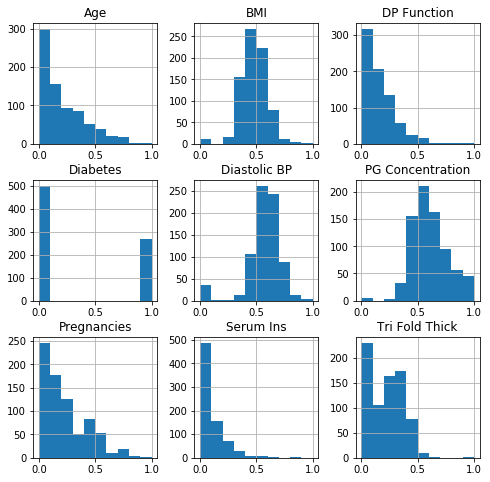

In [ ]:
# Plot histogram of each column separately
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

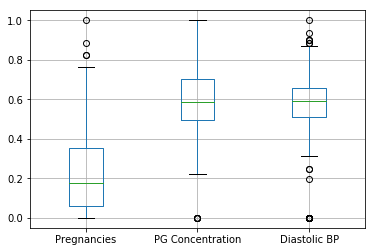

In [ ]:
df.iloc[:,:3].boxplot()

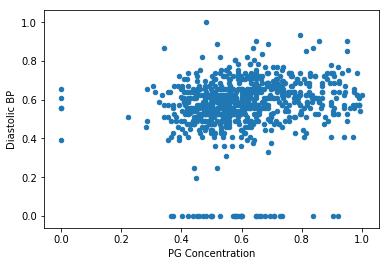

In [ ]:
df.plot.scatter(x='PG Concentration',\
                y='Diastolic BP')